In [3]:
import pandas as pd

In [4]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.isnull().sum()   ### Total missing values in each columns

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [5]:
###There is misssing value in depth input feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
## Lets drop the id column,it does not affect dependent / output feature much
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
###Handling missing values of independent feature depth

df['depth'].unique()                  ###Find out all the unique value presents in depth column

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4,  nan,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       61.8, 58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8,
       65.2, 60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8,
       63.6, 63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6,
       70.6, 59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. ,
       54.6, 59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. ,
       66.6, 57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8,
       67.1, 65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2,
       52.7, 56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7,
       53.4, 65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2,
       55.1, 55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8,
       52.2, 53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56

In [11]:
df['depth'].value_counts()                      ###Thotal number of times the unique value repeated

depth
62.0    1131
61.9    1091
62.1    1016
61.8    1012
62.2     977
        ... 
50.8       1
71.0       1
52.7       1
71.3       1
70.8       1
Name: count, Length: 169, dtype: int64

In [12]:
df['depth'].mode()[0]              ### mode of the column depth

62.0

In [13]:
df['depth']=df['depth'].fillna(df['depth'].mode()[0])               ###Replacing the missing values with mode

In [14]:
##Now check the missing values present or not

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
### Now no missing values present

In [16]:
## check for duplicated records
df.duplicated().sum()

35

In [19]:
### Here duplicated records are present so,drop it 

df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [22]:
df[categorical_columns].describe()     ###Description about all the categorical columns

,cut,color,clarity
count,26932,26932,26932
unique,5,7,8
top,Ideal,G,SI1
freq,10804,5652,6565


In [23]:
df['cut'].value_counts()

cut
Ideal        10804
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

In [24]:
df['color'].value_counts()

color
G    5652
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

In [25]:
df['clarity'].value_counts()

clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1838
IF       891
I1       364
Name: count, dtype: int64

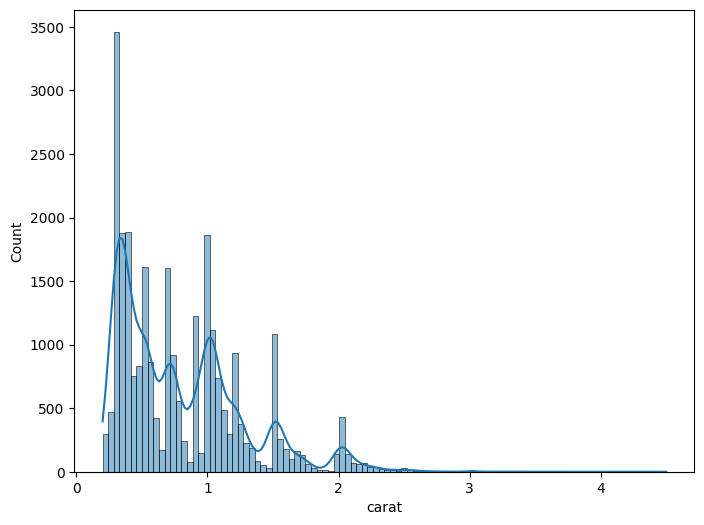

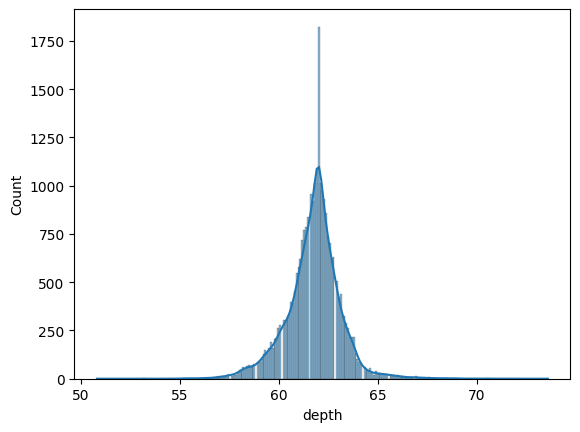

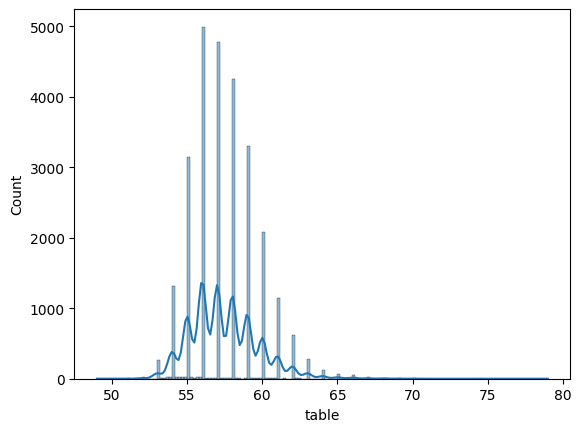

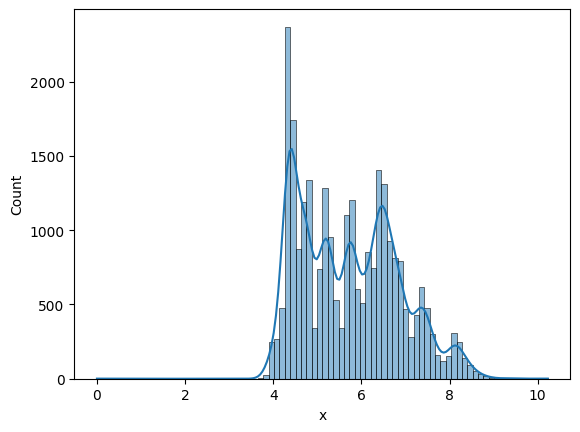

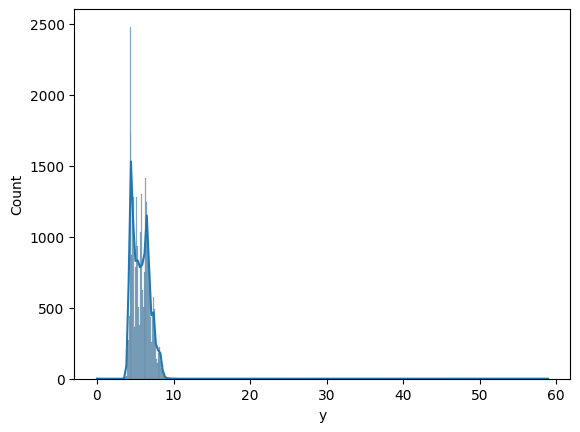

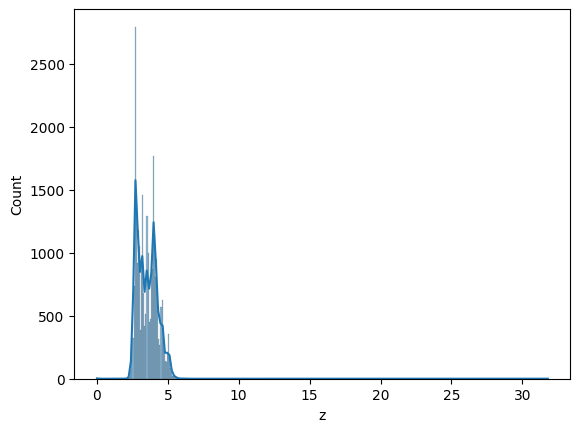

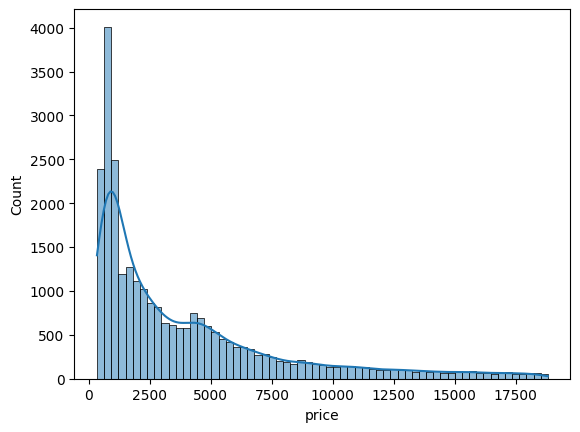

In [26]:
import seaborn as sns                      ###Histogram plot of all the numerical columns which is used to analyze the numerical columns
import matplotlib.pyplot as plt                   ###fif size of the numerical columns are 8,6 and kernel density theorem =True
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [28]:
df['cut'].unique()                    ##Find the unique values present in each categorical columns

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [29]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}       ###mapping is done manually i.e conversion of every categorical 
                                                                       ### columns to numeric columns by mapping the values
                                                                       ###Here mapping is done by seeing the basis of price
                                                                       ###So,those which are ideal get the highest number and those 
                                                                       ###which is jst okk okk get lowest number
                                                                       ###In,this way we done the encoding manually i.e mapping

In [30]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [31]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [32]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [33]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [34]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [35]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779


<Axes: >

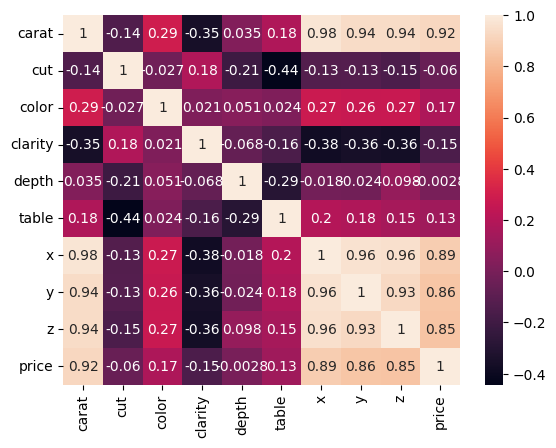

In [36]:
## correlation  between each features with each other
sns.heatmap(df.corr(),annot=True)